In [1]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook
import matplotlib.pyplot as plt
output_notebook()
# 导入notebook绘图模块

from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource
# 导入图表绘制，图标展示模块
# 导入ColumnDataSource模块

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

Loading BokehJS ...

In [2]:
import os
os.chdir('E:\Jupyter_home')
df = pd.read_excel('双十一淘宝美妆数据.xls',index_col=0)
df.head()


,商品ID,商品名称,价格,销量,评价数量,品牌,销售额
日期,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,3713941.0
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,1575668.0
2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,1254132.0
2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,980590.0
2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,722244.0


In [3]:
len(df)

27598

In [4]:
df_columns = df.columns.tolist()
df_columns

['商品ID', '商品名称', '价格', '销量', '评价数量', '品牌', '销售额']

In [5]:
## 清洗数据
df.fillna(0,inplace=True)
df['date'] = df.index.day
df.head()

,商品ID,商品名称,价格,销量,评价数量,品牌,销售额,date
日期,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,1575668.0,14
2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,1254132.0,14
2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,980590.0,14
2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,722244.0,14


In [6]:
# 按照商品销售节奏分类，我们可以将商品分为7类
#    A. 11.11前后及当天都在售 → 一直在售
#    B. 11.11之后停止销售 → 双十一后停止销售
#    C. 11.11开始销售并当天不停止 → 双十一当天上架并持续在售
#    D. 11.11开始销售且当天停止 → 仅双十一当天有售
#    E. 11.5 - 11.10 → 双十一前停止销售
#    F. 仅11.11当天停止销售 → 仅双十一当天停止销售
#    G. 11.12开始销售 → 双十一后上架

data1 = df[['商品ID','商品名称','品牌','date','价格']]
data1.head()

,商品ID,商品名称,品牌,date,价格
日期,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,自然堂,14,139.0
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,自然堂,14,194.0
2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,自然堂,14,99.0
2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,自然堂,14,38.0
2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,自然堂,14,139.0


In [7]:
##统计不同商品的销售开始日期，截止日期
d1 = data1[['商品ID','date','价格']].groupby(by = '商品ID').agg(['min','max'])[['date','价格']]
print(len(d1))
d1.head()

3497


date          价格       
              min max     min    max
商品ID                                
A10027317366    5  14  159.00  258.0
A10588608182    5  14  189.00  249.0
A10847151685    5  14  125.99  240.0
A12229499633    5  10   49.00   49.0
A12229615671    5  11   39.50   79.0

In [8]:
## 筛选双11当天售卖的商品

id_11 = data1[data1['date'] == 11]['商品ID'].unique()
d2 = pd.DataFrame({'商品ID':id_11,'双11当天是否售卖':True})
print(len(d2))
d2.head()

2331


,商品ID,双11当天是否售卖
0,A18177226992,True
1,A18190290933,True
2,A18191681943,True
3,A18422797881,True
4,A18980833277,True


# 统计双11当天在售商品的占比

In [9]:
## 统计双11当天在售商品的占比
id_date = pd.merge(d1,d2,left_index=True,right_on='商品ID',how='left')
id_date['双11当天是否售卖'][id_date['双11当天是否售卖']!= True] = False
# id_date.fillna(False,inplace=True)
# id_date
m = len(data1['商品ID'].unique())
m_11 = len(d2)
m_pre = m_11 / m
print('商品总数为%i个' % m)
print("双十一当天参与活动的商品为%i个，占比为%.2f%%" % (m_11,m_pre * 100))
print('品牌总数为%i个' % len(data1['品牌'].unique()),data1['品牌'].unique())

商品总数为3497个
双十一当天参与活动的商品为2331个，占比为66.66%
品牌总数为22个 ['自然堂' '资生堂' '植村秀' '悦诗风吟' '玉兰油' '雅漾' '雅诗兰黛' '雪花秀' '相宜本草' '薇姿' '倩碧' '欧珀莱'
 '欧莱雅' '妮维雅' '蜜丝佛陀' '美加净' '美宝莲' '兰芝' '兰蔻' '娇兰' '佰草集' 'SKII']


# 按照以下7种类型进行分类，并绘制饼图

A    1817
B     457
C      39
D      18
E     840
F     242
G      84
Name: type, dtype: int64

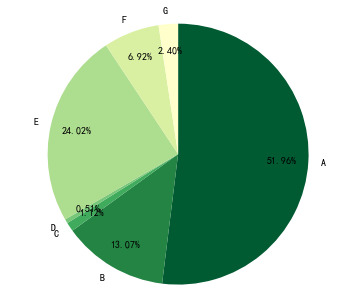

In [10]:
## 分类统计
# 按照商品销售节奏分类，我们可以将商品分为7类
#    A. 11.11前后及当天都在售 → 一直在售
#    B. 11.11之后停止销售 → 双十一后停止销售
#    C. 11.11开始销售并当天不停止 → 双十一当天上架并持续在售
#    D. 11.11开始销售且当天停止 → 仅双十一当天有售
#    E. 11.5 - 11.10 → 双十一前停止销售
#    F. 仅11.11当天停止销售 → 仅双十一当天停止销售
#    G. 11.12开始销售 → 双十一后上架
id_date['type'] = '待分类'
id_date['type'][(id_date[('date','min')]<11)&(id_date[('date','max')]>11)] = 'A'
id_date['type'][(id_date[('date','min')]<11)&(id_date[('date','max')]==11)] = 'B'
id_date['type'][(id_date[('date','min')]==11)&(id_date[('date','max')]>11)] = 'C'
id_date['type'][(id_date[('date','min')]==11)&(id_date[('date','max')]==11)] = 'D'
id_date['type'][id_date['双11当天是否售卖']==False] = 'F'
id_date['type'][id_date[('date','max')]<11] = 'E'
id_date['type'][id_date[('date','min')]>11] = 'G'
# id_date[id_date['type']=='G']
# 商品按照type分类统计，并调整顺序
result1 = id_date['type'].value_counts()
result1 = result1.loc[['A','B','C','D','E','F','G']]

# plt.rcParams['font.sans-serif']=['SimHei']
# # 用来正常显示中文标签
# plt.axis('equal')
# # 保证长宽相等 --> 饼图为圆形
# plt.pie(result1,labels = result1.index, autopct='%.2f%%',pctdistance=0.8,labeldistance =1.1,
#         startangle=90, radius=1.5,counterclock=False)     

from bokeh.palettes import brewer
colori = brewer['YlGn'][7]
# 绘制饼图
plt.axis('equal')  
plt.pie(result1,labels = result1.index, autopct='%.2f%%',pctdistance=0.8,labeldistance =1.1,
        startangle=90, radius=1.5,counterclock=False, colors = colori)
result1

# 未参与双11活动的商品去向分析

In [11]:
# 双11当天下架
id_not11 = id_date[id_date['双11当天是否售卖']==False]
df_not11 = id_not11[['商品ID','type']]
data_not11 = pd.merge(df_not11,df,on = '商品ID', how = 'left')
id_con1 = id_not11[id_not11['type']=='F']
# id_con1

# 重新上架
data_con2 = data_not11[['商品ID','商品名称','date']].groupby(by = ['商品ID','商品名称']).count()
# data_not11[data_not11['商品ID']=='A536510937963']
title_count = data_con2.reset_index()['商品ID'].value_counts()
id_con2 = title_count[title_count > 1]
# id_con2

# 预售
data_con3 = data_not11[data_not11['商品名称'].str.contains('预售')]
id_con3 = data_con3['商品ID'].unique()
# id_con3
print('未参与双十一当天活动的商品中：%i个为暂时下架，%i个重新上架商品，%i个为预售商品' % (len(id_con1),len(id_con2),len(id_con3)))

未参与双十一当天活动的商品中：242个为暂时下架，110个重新上架商品，453个为预售商品


# 真正参与双11活动的商品及品牌情况
### 可以参考同一目录下的bokeh练习代码

In [12]:
# 合并在售和预售
id_11_final = np.hstack((id_11,id_con3))
df_11_final = pd.DataFrame({'id':id_11_final})

# 在售的品牌数量
x1 = pd.DataFrame({'商品ID':id_11})
x1_df = pd.merge(x1,df,on='商品ID',how='left')
x1_df = x1_df[['商品ID','品牌']].drop_duplicates()
brand_11sale = x1_df.groupby(by = '品牌')['商品ID'].count()
# 预售的品牌数量
x2 = pd.DataFrame({'商品ID':id_con3})
x2_df = pd.merge(x2,df,on='商品ID',how='left')
x2_df = x2_df[['商品ID','品牌']].drop_duplicates()
brand_ys = x2_df.groupby(by = '品牌')['商品ID'].count()

# 在售+预售，做成DataFrame
result_data = pd.DataFrame({'在售商品数量':brand_11sale,'预售商品数量':brand_ys})
result_data['总量'] = result_data['在售商品数量'] + result_data['预售商品数量']
result_data.sort_values(by = '总量',ascending=False,inplace=True)

from bokeh.models import HoverTool
from bokeh.core.properties import value
from bokeh.plotting import figure, show



result_data.index.name = 'brand'
result_data.columns = ['双11在售', '双11预售', 'sum']
lst_brand = result_data.index.tolist()
lst_type = result_data.columns.tolist()[:2]
# colors = ['red', 'green']
colors = ["#718dbf" ,"#e84d60"]

# 创建ColumnDataSource数据源
source = ColumnDataSource(result_data)

# HoverTool，当指针停留在柱状图时会出现数据
hover = HoverTool(tooltips = [("品牌", "@brand"),
                              ("双十一当天参与活动的商品数量", "@{双11在售}"),
                              ("预售商品数量", "@{双11预售}"),
                              ("真正参与双十一活动的商品总数", "@sum")])

p = figure(tools = [hover,'reset, xwheel_zoom, pan, crosshair'],
           x_range = lst_brand, plot_width = 900, plot_height = 350,
           title = '各个品牌参与双十一活动的情况')


p.vbar_stack(stackers = lst_type,
              x = 'brand', source = source,
              width = 0.9, color = colors, alpha = 0.8,
              legend = [value(x) for x in lst_type])

show(p)



## 哪些商品真正在打折？
#### 真打折：商品的价格在10天内有波动，双11价格为10天内最低价，无提前涨价
#### 假打折：双十一之前存在涨价现象
#### 不打折：商品价格无变化

In [14]:
import os
os.chdir('E:\Jupyter_home')
df = pd.read_excel('双十一淘宝美妆数据.xls',index_col=0)
df.fillna(0,inplace = True)
df['date'] = df.index.day
df.head()
# 加载数据，提取日期

,商品ID,商品名称,价格,销量,评价数量,品牌,销售额,date
日期,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,1575668.0,14
2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,1254132.0,14
2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,980590.0,14
2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,722244.0,14


In [15]:
df2 = df[['商品ID','商品名称','品牌','价格','date']]
df2['period'] = pd.cut(x = df['date'],bins = [4,10,11,14],labels = ['双十一前','双十一当天','双十一后'])
# 筛选数据

price = df2[['商品ID','价格','period','品牌']].groupby(by = ['商品ID','period']).min()
price.reset_index(inplace = True)
# price
# 筛选双十一前，双十一当天，双十一后，商品的最低价

res_before11 = price[price['period'] == '双十一前']
res_at11 = price[price['period'] == '双十一当天']
res_data = pd.merge(res_at11,res_before11,on = '商品ID')
# res_data

res_data['zkl'] = res_data['价格_x'] / res_data['价格_y']
# res_data
# 计算折扣率

# 将数据按照折扣率拆分为不同区间，并统计不同1扣率的商品数量
bokeh_data = res_data[['商品ID','zkl']].dropna()
bokeh_data['zkl_range'] = pd.cut(bokeh_data['zkl'],bins = np.linspace(0,1,21))
bokeh_data2 = bokeh_data.groupby(by = ['zkl_range']).count().iloc[:-1]
bokeh_data2['zkl_percent'] = bokeh_data2['zkl'] / bokeh_data2['zkl'].sum()
bokeh_data2 = bokeh_data2.reset_index().drop('商品ID',axis = 1)
# bokeh_data2.dtypes
# 查看bokeh_data2数据类型，zkl_range类型为category --> str
bokeh_data2['zkl_range'] = bokeh_data2['zkl_range'].astype(str)
# bokeh_data2['zkl_range'] = list(map(str,bokeh_data2['zkl_range']))
# bokeh_data2.dtypes

# 创建ColumnDataSource数据源
source1 = ColumnDataSource(bokeh_data2)
lst_zkl = bokeh_data2['zkl_range'].tolist()
# HoverTool，当指针停留在柱状图时会出现数据
hover = HoverTool(tooltips = [("折扣商品数量", "@zkl"),("该区间折扣率占比","@zkl_percent")])

p = figure(tools = [hover,'reset, xwheel_zoom, pan, crosshair'],
           x_range = lst_zkl, plot_width = 900, plot_height = 350,
           title = '商品折扣率统计')
# 构建绘图空间

# line_dash：破折号的长度和间隔
p.line(x = 'zkl_range',y = 'zkl_percent',source = source1,line_width=2, line_alpha = 0.8, line_color = 'black',line_dash = [10,4])
# 绘制折线图

p.circle(x = 'zkl_range',y = 'zkl_percent',source = source1,color = 'red',size = 8,alpha = 0.8)
p.xgrid.grid_line_color = None
# 其他参数
show(p)
# 用bokeh绘制折线图：x轴为折扣率，y轴为商品数量占比

### 观察上图可知，商品折扣率主要集中在五折和九折，二者共占50%以上
# 哪些商品属于良心商品？

In [16]:
# 用bokeh绘制浮动散点图，y坐标为品牌类型，x坐标为折扣力度

from bokeh.transform import jitter

brands = lst_brand.copy()
bokeh_data3 = res_data[['商品ID','品牌_y','zkl']].dropna()
bokeh_data3 = bokeh_data3[bokeh_data3['zkl'] < 0.96]

source2 = ColumnDataSource(bokeh_data3)
# 创建数据

lst_zkl = bokeh_data3['zkl'].tolist()
hover = HoverTool(tooltips = [('折扣率','@zkl')])

p = figure(y_range = brands,title = '不同品牌折扣率情况',plot_width = 900,plot_height = 600,
           tools = [hover,'reset, xwheel_zoom, pan, crosshair'])

# p.circle(x = 'zkl',y = '品牌_y',source = source2,color = 'red',size = 4,alpha = 0.8)
p.circle(x='zkl', y=jitter('品牌_y', width=0.6, range=p.y_range),source=source2, alpha=0.3)
p.ygrid.grid_line_color = None
# 把网格的横线去掉
show(p)